# Data related tasks

This notebook is a toy example for loading the raw data, processing it to a dataset, saving it, and loading it again through the module.

In [1]:
import sys
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))
# We change the working directory to the root of the project
# Run this only once
root_path = Path.cwd().parent
os.chdir(root_path)
sys.path.append(root_path / "src")


In [14]:
from experiments.datasets.datasets import GaussianNoiseDataset
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to Tensor in [0, 1]
    transforms.Normalize(mean=[0.1307], std=[0.3081])
])

# 2. Load base MNIST dataset with normalization
base_mnist = datasets.MNIST(root="data", train=True, download=True, transform=transform)

# 3. Wrap it in GaussianNoiseDataset
noisy_mnist = GaussianNoiseDataset(base_dataset=base_mnist, noise_std=1)

# 4. Use with DataLoader
from torch.utils.data import DataLoader
loader = DataLoader(noisy_mnist, batch_size=64, shuffle=True)

In [15]:
batch = next(iter(loader))

In [16]:
len(batch)
batch[0].shape, batch[1].shape, batch[2].shape

(torch.Size([64, 1, 28, 28]), torch.Size([64, 1, 28, 28]), torch.Size([64]))

Text(0.5, 1.0, 'y')

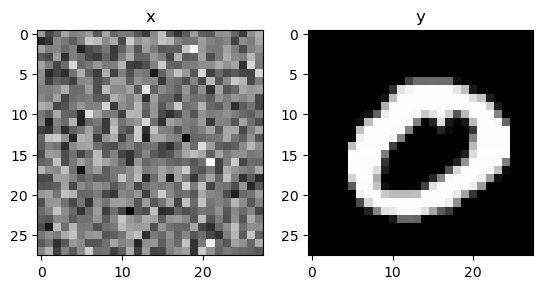

In [22]:
# Show a (x, y) pair
import matplotlib.pyplot as plt
x = batch[0][0]
y = batch[1][0]
plt.subplot(1, 2, 1)
plt.imshow(x[0], cmap='gray')
plt.title("x")
plt.subplot(1, 2, 2)
plt.imshow(y[0], cmap='gray')
plt.title("y")